### Regression model V20
Use most recent 20% as test set to test leakage in new feature avg prior late arrival 
try gradient boosted regressor (see cell 14)

In [1]:
fileprefix='./lateness_PREP_V11_'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_X=pd.read_csv(fileprefix+'X.csv', sep='\t')

In [4]:
df_X.shape

(125675, 216)

In [5]:
df_y=pd.read_csv(fileprefix+'y.csv', sep='\t', header=None)

In [6]:
type(df_y)
df_y.shape

(125675, 2)

In [7]:
df_y.head()

,0,1
0,5,-497.0
1,6,5.0
2,7,-313.0
3,8,-296.0
4,9,-166.0


In [8]:
y=df_y[1]
y.head()

0   -497.0
1      5.0
2   -313.0
3   -296.0
4   -166.0
Name: 1, dtype: float64

In [9]:
y.shape

(125675,)

In [10]:
df_X.head()

,Unnamed: 0,claimed_at_pdt_hour_4,claimed_at_pdt_hour_13,lead_organizer_created_at_pdt_hour,origin_region_name_San Francisco,created_at_pdt_month,destination_lat,origin_region_name_Orange County - North,created_at_pdt_weekday,driver_signup_before_trip_created_secs,...,scheduled_starts_at_pdt_hour_10,driver_previous_completed_trips,claimed_at_pdt_hour_1,lead_organizer_created_at_pdt_weekofyear,scheduled_starts_at_pdt_hour_12,origin_analysis_metro_name_LA,shuttle_int,lead_organizer_created_at_pdt_dayofyear,scheduled_starts_at_pdt_dayofyear,lead_organizer_platform_ios
0,5,0,0,19,0,2,34.18,0,6,18685416.0,...,0,663.0,0,26,0,1,0,185,45,1
1,6,0,0,19,0,1,34.10,0,3,16613901.0,...,0,634.0,0,26,0,1,0,185,24,1
2,7,0,0,20,0,2,34.16,0,6,18684204.0,...,0,649.0,0,26,0,1,0,185,39,1
3,8,0,0,20,0,1,34.17,0,2,17715744.0,...,0,637.0,0,26,0,1,0,185,26,1
4,9,0,0,19,0,10,34.12,0,0,7851048.0,...,0,629.0,0,26,0,1,0,185,23,1


In [11]:
y.describe().round()

count    125675.0
mean       -416.0
std         509.0
min       -1800.0
25%        -657.0
50%        -324.0
75%         -96.0
max        1800.0
Name: 1, dtype: float64

In [46]:
# break df_X,y into test and train sets
###from sklearn.model_selection import train_test_split
###X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.20, random_state=808)
# use first 80% as train and last 30% as test to test for leakage
###print(y.shape[0])
###train_split=0.80
###index = int(np.floor(y.shape[0] * train_split))
###print(index)
###y_train = y[:index]
###print(y_train.shape)
###X_train = df_X[:index]
###print(X_train.shape)
###y_test = y[index:]
###print(y_test.shape)
##print(y_train.head())
##print(y_train.tail())
##print(y_test.head())
##print(y_test.tail())
###X_test = df_X[index:]
###print(X_test.shape)
###X_train.iloc[:10]['scheduled_starts_at_pdt_dayofyear']
## this shows df_X (and y) are not in time sorted order... so try another approach
##X_train.iloc[:10]['scheduled_starts_at_pdt_dayofyear'][X_train['scheduled_starts_at_pdt_dayofyear']<100]
###df_X[df_X.scheduled_starts_at_pdt_dayofyear>=100]['scheduled_starts_at_pdt_dayofyear'].head(10)
###y[df_X.scheduled_starts_at_pdt_dayofyear>=100].head(10)
###y[df_X.scheduled_starts_at_pdt_dayofyear>=299].count()

## to test for leakage train on older data and test on newer data
## approximate 80/20 split
## data contains 1 year of data, first 298 days of the year use for training, rest use for testing
y_train = y[df_X.scheduled_starts_at_pdt_dayofyear<299]
X_train = df_X[df_X.scheduled_starts_at_pdt_dayofyear<299]
y_test = y[df_X.scheduled_starts_at_pdt_dayofyear>=299]
X_test = df_X[df_X.scheduled_starts_at_pdt_dayofyear>=299]


In [47]:
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(100198, 216)
(25477, 216)
(100198,)
(25477,)


In [48]:
# select a regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(max_depth=4, random_state=808, n_estimators=200)

In [49]:
# fit model
model=model.fit(X_train,y_train)

In [50]:
print(model.feature_importances_)

[2.28555510e-02 8.73578591e-04 6.44664375e-04 5.54849464e-03
 0.00000000e+00 8.93844687e-05 9.50098640e-03 0.00000000e+00
 1.86967733e-03 1.37766945e-02 0.00000000e+00 1.04116471e-03
 5.25640202e-04 1.02506902e-03 1.57811148e-04 0.00000000e+00
 7.95846879e-05 5.92826096e-03 0.00000000e+00 3.31915677e-03
 0.00000000e+00 5.05534791e-04 3.06105505e-04 4.88077062e-04
 3.67566209e-04 1.32412056e-02 0.00000000e+00 3.72227872e-02
 5.02813757e-02 1.91082574e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.49743767e-02 2.84031009e-03 0.00000000e+00
 4.91924262e-04 0.00000000e+00 0.00000000e+00 1.17475949e-02
 1.42183203e-02 2.97791598e-03 6.33489729e-04 1.61616648e-02
 1.72653578e-03 8.47784257e-04 1.79789628e-06 1.87580490e-03
 1.16085966e-03 4.61842608e-04 0.00000000e+00 4.81043107e-04
 0.00000000e+00 1.58659365e-01 4.54218779e-04 5.78123192e-04
 1.01378580e-02 1.88109538e-02 4.39302952e-03 1.17112252e-02
 1.02972703e-03 2.16674922e-03 4.04673229e-03 1.45371310e-03
 1.70680235e-02 2.040333

In [51]:
importances = list(zip(model.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.15865936524633667, 'avg_prior_arrived_late_seconds'),
 (0.05028137572985059, 'claimed_before_trip_start_secs'),
 (0.03766486684246616, 'driver_previous_completed_trips'),
 (0.03722278715594114, 'driver_home_lon'),
 (0.03565088220182171, 'driver_id'),
 (0.03250485841424662, 'driver_home_lat'),
 (0.02862058860752911, 'origin_location_id'),
 (0.028169274088713482, 'scheduled_starts_at_pdt_hour'),
 (0.026317624350436206, 'driver_created_at_pdt_dayofyear'),
 (0.02493908814760605, 'origin_lon'),
 (0.022855550953449332, 'Unnamed: 0'),
 (0.020928971022296003, 'driver_signup_before_trip_start_secs'),
 (0.01881095381973332, 'trip_created_before_trip_start_secs'),
 (0.01755459546041832, 'destination_location_id'),
 (0.01736985411355486, 'origin_lat'),
 (0.017068023490225414, 'driver_created_at_pdt_day'),
 (0.016161664781040433, 'driver_signup_before_org_signup_secs'),
 (0.015232895756191786, 'org_signup_before_trip_start_secs'),
 (0.015157478410995899, 'id'),
 (0.014974376699647282, 'trip_est

In [52]:
# top 10 importances
dict(importances[:10]).values()


dict_values(['avg_prior_arrived_late_seconds', 'claimed_before_trip_start_secs', 'driver_previous_completed_trips', 'driver_home_lon', 'driver_id', 'driver_home_lat', 'origin_location_id', 'scheduled_starts_at_pdt_hour', 'driver_created_at_pdt_dayofyear', 'origin_lon'])

In [53]:
# number of non-zero features used
len([(i,f) for i, f in importances if i > 0])

152

In [54]:
# number of features with importance above 1%
len([(i,f) for i, f in importances if i > 0.01])

31

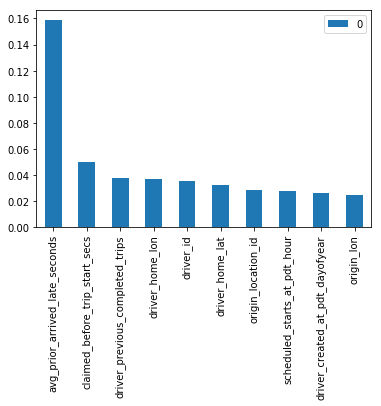

In [56]:
pd.DataFrame(importances[:10], index=[x for (_,x) in importances[:10] ]).plot(kind = 'bar')

In [57]:
# score against TRAINING set
model.score(X_train,y_train)

0.29379630016932234

In [58]:
# score against TEST set
model.score(X_test,y_test)

0.17880554180598396

In [59]:
model_y_test_pred = model.predict(X_test)
model_y_test_pred.size

25477

In [60]:
type(model_y_test_pred)

numpy.ndarray

In [61]:
model_y_test_pred[:10]

array([-270.17190677, -207.3364827 ,   18.53882978, -185.42022056,
         66.44927654, -114.35239602, -325.37415755, -676.88177902,
       -194.66226717, -551.80785578])

In [62]:
pd.Series(model_y_test_pred).std()

246.01284894860316

In [63]:
pd.Series(model_y_test_pred).corr(y_test)

-0.0086116083461328

In [64]:
# regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from math import sqrt
print ("%.3f %.2f %.0f %.3f %.0f %.0f %.2f" % 
       (explained_variance_score(y_test, model_y_test_pred),
        sqrt(mean_squared_error(y_test, model_y_test_pred))/60, # sqrt of MSE in minutes
        mean_squared_error(y_test, model_y_test_pred), 
        r2_score(y_test, model_y_test_pred), 
        mean_absolute_error(y_test, model_y_test_pred), 
        median_absolute_error(y_test, model_y_test_pred),
        median_absolute_error(y_test, model_y_test_pred)/60 # MAE in minutes
       ))

0.180 7.57 206403 0.179 337 251 4.18


In [65]:
# make classifications from seconds late target
bins = np.array([0.0, 5*60, 15*60]) # 0 on-time, 1 almost on-time, 2 late, 3 extremely late
bins

array([  0., 300., 900.])

In [66]:
np.digitize(y_test, bins)[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [67]:
# materialize y_test_class array
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
y_test_class=np.digitize(y_test, bins)
unique, counts = np.unique(y_test_class, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 21301]
 [    1  3118]
 [    2   904]
 [    3   154]]


In [68]:
# materialize model_y_pred_class
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
model_y_test_pred_class=np.digitize(model_y_test_pred, bins)
print(np.asarray(np.unique(model_y_test_pred_class, return_counts=True)).T)

[[    0 24941]
 [    1   457]
 [    2    69]
 [    3    10]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class,model_y_test_pred_class))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91     21301
          1       0.29      0.04      0.07      3118
          2       0.26      0.02      0.04       904
          3       0.20      0.01      0.02       154

avg / total       0.75      0.83      0.77     25477



In [70]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_class,model_y_test_pred_class,labels=[0,1,2,3]))

[[21006   273    22     0]
 [ 2970   132    13     3]
 [  838    43    18     5]
 [  127     9    16     2]]
